<h1>Week 5 Assignment</h1>

In [11]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [30]:
df = pd.read_excel('C:/Users/Primasolv/Desktop/completedataset.xlsx')

In [31]:
df.head(5)

Unnamed: 0  Borough      Neighborhoods   Latitude  Longitude  Population  \
0           0  Central    Cantonment area  12.972442  77.580643      866377   
1           1  Central             Domlur  12.960992  77.638726      743186   
2           2  Central        Indiranagar  12.971891  77.641151      474289   
3           3  Central  Jeevanbheemanagar  12.962900  77.659500      527874   
4           4  Central        Malleswaram  13.003100  77.564300      893629   

        City  AverageIncome  
0  Bangalore   18944.099792  
1  Bangalore   56837.022198  
2  Bangalore   41991.817435  
3  Bangalore    6667.447632  
4  Bangalore   53270.063892

In [32]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [33]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [34]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [35]:
bangalore_population.to_excel('C:/Users/Primasolv/Desktop/datasetone.xlsx')

In [36]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [38]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [39]:
bangalore_income.to_excel('C:/Users/Primasolv/Desktop/incomedataset.xlsx')

In [40]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [41]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [42]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [43]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [44]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [45]:
borough_colors

{'Central': '#8D3C24',
 'Eastern': '#678295',
 'NorthEastern': '#BB685C',
 'Northern': '#18C3D4',
 'SouthEastern': '#15BEA3',
 'Southern': '#342E53',
 'SouthernSuburbs': '#F18B16',
 'Western': '#DD4B6D'}

In [46]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [47]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [49]:
bangalore_map

<h2>Exploring Neighborhoods using foursquare API</h2>

In [50]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [51]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [52]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  600


In [53]:
bangalore_venues.head(5)

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
0  Cantonment area  Central              12.972442               77.580643   
1  Cantonment area  Central              12.972442               77.580643   
2  Cantonment area  Central              12.972442               77.580643   
3  Cantonment area  Central              12.972442               77.580643   
4  Cantonment area  Central              12.972442               77.580643   

              Venue  Venue Latitude  Venue Longitude      Venue Category  
0    Hotel Fishland       12.975569        77.578592  Seafood Restaurant  
1      Adigas Hotel       12.973554        77.579161          Restaurant  
2  Sapna Book House       12.976355        77.578461           Bookstore  
3    Vasudev Adigas       12.973707        77.579257   Indian Restaurant  
4  Kamat Yatrinivas       12.975985        77.578125   Indian Restaurant

In [54]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       117
Café                     31
Fast Food Restaurant     29
Bakery                   24
Ice Cream Shop           24
Pizza Place              19
Department Store         18
Chinese Restaurant       16
Coffee Shop              16
Park                     10
Name: Neighborhood, dtype: int64

In [55]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  130


<h2>Getting number of venues per neighborhood</h2>

In [56]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [57]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             5
                Domlur                     14
                Indiranagar                65
                Jeevanbheemanagar           4
                Malleswaram                 6
                Pete area                   7
                Rajajinagar                14
                Sadashivanagar             20
                Seshadripuram               9
                Shivajinagar               11
                Ulsoor                      4
                Vasanth Nagar              25
Eastern         Bellandur                  19
                CV Raman Nagar              6
                Hoodi                       5
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                9
                Varthur                     1
                Whitefield                  9
NorthEastern    Banaswadi                   7
                HBR Layout                  4
                Kammanahalli               12
                Lingarajapuram              1
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  13
                R. T. Nagar                 9
                Vidyaranyapura              1
                Yelahanka                   5
                Yeshwanthpur                8
SouthEastern    BTM Layout                 36
                Bommanahalli                6
                Bommasandra                 1
                Electronic City             5
                HSR Layout                 12
                Koramangala                 6
                Madiwala                   23
Southern        Banashankari               13
                Basavanagudi               10
                Girinagar                   4
                J. P. Nagar                27
                Jayanagar                  14
                Kumaraswamy Layout         10
                Padmanabhanagar             3
                Uttarahalli                12
SouthernSuburbs Anjanapura                  1
                Arekere                    24
                Begur                       4
                Gottigere                   6
                Hulimavu                    4
                Kothnur                     3
Western         Basaveshwaranagar          22
                Kamakshipalya               2
                Kengeri                     5
                Mahalakshmi Layout         11
                Nagarbhavi                  7
                Nayandahalli                3
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

In [59]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
232   Whitefield  Eastern                12.9698                 77.7499   
233   Whitefield  Eastern                12.9698                 77.7499   
234   Whitefield  Eastern                12.9698                 77.7499   
235   Whitefield  Eastern                12.9698                 77.7499   
236   Whitefield  Eastern                12.9698                 77.7499   
237   Whitefield  Eastern                12.9698                 77.7499   
238   Whitefield  Eastern                12.9698                 77.7499   
239   Whitefield  Eastern                12.9698                 77.7499   
240   Whitefield  Eastern                12.9698                 77.7499   

                              Venue  Venue Latitude  Venue Longitude  \
232                Herbs and Spices       12.968145        77.750862   
233                       Golds Gym       12.972217        77.750529   
234                    Chef Baker's       12.969730        77.751302   
235             Royal Orchid Suites       12.966774        77.751262   
236  The river side bar and kitchen       12.967298        77.749614   
237              Bangalore Mandarin       12.969631        77.750130   
238                      Cheenavala       12.966435        77.749368   
239                        Calvin's       12.973117        77.749514   
240                         refresh       12.965621        77.749234   

                  Venue Category  
232  Eastern European Restaurant  
233         Gym / Fitness Center  
234                       Bakery  
235                        Hotel  
236                    Hotel Bar  
237           Chinese Restaurant  
238            Kerala Restaurant  
239                         Café  
240                         Café

In [60]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [61]:
bangalore_venues_onehot

Venue Category_ATM  Venue Category_Accessories Store  \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
5                     0                                 0   
6                     0                                 0   
7                     0                                 0   
8                     0                                 0   
9                     0                                 0   
10                    0                                 0   
11                    0                                 0   
12                    0                                 0   
13                    0                                 0   
14                    0                                 0   
15                    0                                 0   
16                    0                                 0   
17                    0                                 0   
18                    0                                 0   
19                    0                                 0   
20                    0                                 0   
21                    0                                 0   
22                    0                                 0   
23                    0                                 0   
24                    0                                 0   
25                    0                                 0   
26                    0                                 0   
27                    0                                 0   
28                    0                                 0   
29                    0                                 0   
30                    0                                 0   
31                    0                                 0   
32                    0                                 0   
33                    0                                 0   
34                    0                                 0   
35                    0                                 0   
36                    0                                 0   
37                    0                                 0   
38                    0                                 0   
39                    0                                 0   
40                    0                                 0   
41                    0                                 0   
42                    0                                 0   
43                    0                                 0   
44                    0                                 0   
45                    0                                 0   
46                    0                                 0   
47                    0                                 0   
48                    0                                 0   
49                    0                                 0   
50                    0                                 0   
51                    0                                 0   
52                    0                                 0   
53                    0                                 0   
54                    0                                 0   
55                    0                                 0   
56                    0                                 0   
57                    0                                 0   
58                    0                                 0   
59                    0                                 0   
60                    0                                 0   
61                    0                                 0   
62                    0                                 0   
63                    0                                 0   
64                    0                 

In [62]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

Neighborhood  Venue Category_ATM  \
0             Anjanapura                 1.0   
1                Arekere                 0.0   
2             BTM Layout                 0.0   
3           Banashankari                 0.0   
4              Banaswadi                 0.0   
5           Basavanagudi                 0.0   
6      Basaveshwaranagar                 0.0   
7                  Begur                 0.0   
8              Bellandur                 0.0   
9           Bommanahalli                 0.0   
10           Bommasandra                 0.0   
11        CV Raman Nagar                 0.0   
12       Cantonment area                 0.0   
13                Domlur                 0.0   
14       Electronic City                 0.0   
15             Girinagar                 0.0   
16             Gottigere                 0.0   
17            HBR Layout                 0.0   
18            HSR Layout                 0.0   
19                Hebbal                 0.0   
20                 Hoodi                 0.0   
21              Hulimavu                 0.0   
22           Indiranagar                 0.0   
23           J. P. Nagar                 0.0   
24             Jalahalli                 0.0   
25             Jayanagar                 0.0   
26     Jeevanbheemanagar                 0.0   
27         Kamakshipalya                 0.5   
28          Kammanahalli                 0.0   
29               Kengeri                 0.0   
30           Koramangala                 0.0   
31               Kothnur                 0.0   
32      Krishnarajapuram                 0.0   
33    Kumaraswamy Layout                 0.0   
34        Lingarajapuram                 0.0   
35              Madiwala                 0.0   
36          Mahadevapura                 0.0   
37    Mahalakshmi Layout                 0.0   
38           Malleswaram                 0.0   
39          Marathahalli                 0.0   
40             Mathikere                 0.0   
41            Nagarbhavi                 0.0   
42          Nayandahalli                 0.0   
43       Padmanabhanagar                 0.0   
44             Pete area                 0.0   
45           R. T. Nagar                 0.0   
46           Rajajinagar                 0.0   
47  Rajarajeshwari Nagar                 0.0   
48      Ramamurthy Nagar                 0.4   
49        Sadashivanagar                 0.0   
50         Seshadripuram                 0.0   
51          Shivajinagar                 0.0   
52                Ulsoor                 0.0   
53           Uttarahalli                 0.0   
54               Varthur                 0.0   
55         Vasanth Nagar                 0.0   
56        Vidyaranyapura                 1.0   
57           Vijayanagar                 0.0   
58            Whitefield                 0.0   
59             Yelahanka                 0.2   
60          Yeshwanthpur                 0.0   

    Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.076923                          0.000000   
4                           0.000000                          0.000000   
5                           0.000000                          0.000000   
6                           0.000000                          0.000000   
7                           0.000000                          0.000000   
8                           0.000000                          0.000000   
9                           0.000000                          0.000000   
10                          0.000000                          0.000000   
11                          0.000000                          0.000000   
12                          0.000000                          0.000000   

In [63]:
number_of_top_venues = 5

In [64]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                    Venue  Frequency
0                      Venue Category_ATM        1.0
1                     Venue Category_Park        0.0
2             Venue Category_Outlet Store        0.0
3             Venue Category_Optical Shop        0.0
4  Venue Category_North Indian Restaurant        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.25
1  Venue Category_Sporting Goods Shop       0.12
2     Venue Category_Department Store       0.08
3          Venue Category_Pizza Place       0.08
4         Venue Category_Liquor Store       0.04


--------- BTM Layout ---------
                               Venue  Frequency
0   Venue Category_Indian Restaurant       0.19
1      Venue Category_Ice Cream Shop       0.08
2         Venue Category_Snack Place       0.08
3  Venue Category_Chinese Restaurant       0.08
4         Venue Category_Coffee Shop       0.06


----

                                 Venue  Frequency
0  Venue Category_Fast Food Restaurant       0.33
1            Venue Category_Toll Plaza       0.33
2                  Venue Category_Road       0.33
3                   Venue Category_ATM       0.00
4    Venue Category_Miscellaneous Shop       0.00


--------- Padmanabhanagar ---------
                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.33
1  Venue Category_Fast Food Restaurant       0.33
2           Venue Category_Snack Place       0.33
3   Venue Category_Indie Movie Theater       0.00
4    Venue Category_Italian Restaurant       0.00


--------- Pete area ---------
                              Venue  Frequency
0             Venue Category_Market       0.29
1         Venue Category_Food Truck       0.14
2  Venue Category_Indian Restaurant       0.14
3      Venue Category_Metro Station       0.14
4               Venue Category_Food       0.14


--------- R. T. Nagar ---------
              

In [65]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [66]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari               Venue Category_Café   
4     Banaswadi  Venue Category_Indian Restaurant   

                2nd Most Common Venue  \
0         Venue Category_Cupcake Shop   
1  Venue Category_Sporting Goods Shop   
2       Venue Category_Ice Cream Shop   
3       Venue Category_Clothing Store   
4               Venue Category_Bakery   

                          3rd Most Common Venue  \
0               Venue Category_Department Store   
1               Venue Category_Department Store   
2                    Venue Category_Snack Place   
3              Venue Category_Indian Restaurant   
4  Venue Category_Vegetarian / Vegan Restaurant   

               4th Most Common Venue              5th Most Common Venue  \
0        Venue Category_Dessert Shop  Venue Category_Dim Sum Restaurant   
1         Venue Category_Pizza Place            Venue Category_Bus Line   
2  Venue Category_Chinese Restaurant              Venue Category_Bakery   
3          Venue Category_Shoe Store   Venue Category_Accessories Store   
4              Venue Category_Market           Venue Category_Juice Bar   

                          6th Most Common Venue  \
0                          Venue Category_Diner   
1                 Venue Category_Breakfast Spot   
2  Venue Category_Vegetarian / Vegan Restaurant   
3               Venue Category_Udupi Restaurant   
4                  Venue Category_Women's Store   

                    7th Most Common Venue  \
0               Venue Category_Donut Shop   
1         Venue Category_Business Service   
2           Venue Category_Sandwich Place   
3  Venue Category_North Indian Restaurant   
4        Venue Category_Food & Drink Shop   

                        8th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1         Venue Category_Fast Food Restaurant   
2                  Venue Category_Coffee Shop   
3                         Venue Category_Park   
4                         Venue Category_Food   

               9th Most Common Venue               10th Most Common Venue  
0   Venue Category_Electronics Store    Venue Category_Falafel Restaurant  
1  Venue Category_Chinese Restaurant                   Venue Category_Bar  
2         Venue Category_Pizza Place  Venue Category_Fast Food Restaurant  
3         Venue Category_Pizza Place    Venue Category_Miscellaneous Shop  
4         Venue Category_Flea Market     Venue Category_Fish & Chips Shop

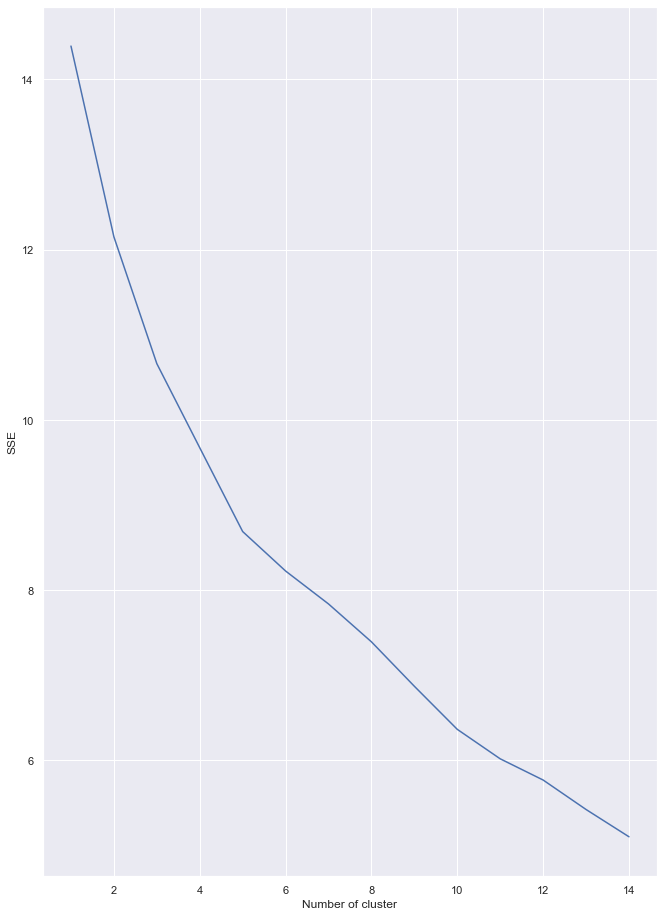

In [67]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [68]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [69]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [70]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [71]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    20
1     8
2     6
3    20
4     7
Name: Neighborhood, dtype: int64

In [72]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Arts & Crafts Store',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       ...
       'Venue Category_Supermarket', 'Venue Category_Tea Room',
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Train Station', 'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Cluster'],
      dtype='object', length=132)

In [73]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [74]:
neighborhoods_venues_sorted.head(4)

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari               Venue Category_Café   

                2nd Most Common Venue             3rd Most Common Venue  \
0         Venue Category_Cupcake Shop   Venue Category_Department Store   
1  Venue Category_Sporting Goods Shop   Venue Category_Department Store   
2       Venue Category_Ice Cream Shop        Venue Category_Snack Place   
3       Venue Category_Clothing Store  Venue Category_Indian Restaurant   

               4th Most Common Venue              5th Most Common Venue  \
0        Venue Category_Dessert Shop  Venue Category_Dim Sum Restaurant   
1         Venue Category_Pizza Place            Venue Category_Bus Line   
2  Venue Category_Chinese Restaurant              Venue Category_Bakery   
3          Venue Category_Shoe Store   Venue Category_Accessories Store   

                          6th Most Common Venue  \
0                          Venue Category_Diner   
1                 Venue Category_Breakfast Spot   
2  Venue Category_Vegetarian / Vegan Restaurant   
3               Venue Category_Udupi Restaurant   

                    7th Most Common Venue  \
0               Venue Category_Donut Shop   
1         Venue Category_Business Service   
2           Venue Category_Sandwich Place   
3  Venue Category_North Indian Restaurant   

                        8th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1         Venue Category_Fast Food Restaurant   
2                  Venue Category_Coffee Shop   
3                         Venue Category_Park   

               9th Most Common Venue               10th Most Common Venue  \
0   Venue Category_Electronics Store    Venue Category_Falafel Restaurant   
1  Venue Category_Chinese Restaurant                   Venue Category_Bar   
2         Venue Category_Pizza Place  Venue Category_Fast Food Restaurant   
3         Venue Category_Pizza Place    Venue Category_Miscellaneous Shop   

   Venue Category_ATM  Venue Category_Accessories Store  \
0                 1.0                          0.000000   
1                 0.0                          0.000000   
2                 0.0                          0.000000   
3                 0.0                          0.076923   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  Venue Category_Basketball Court  \
0               0.000000            0.000000                              0.0   
1               0.000000            0.041667          

In [75]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')


In [76]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)


In [77]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [78]:
map_clusters

In [79]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [80]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [81]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

Borough      Neighborhoods  Population  Normalized_population
0  Central    Cantonment area      866377               0.880810
1  Central             Domlur      743186               0.755567
2  Central        Indiranagar      474289               0.482190
3  Central  Jeevanbheemanagar      527874               0.536668
4  Central        Malleswaram      893629               0.908516

In [82]:
bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

Borough      Neighborhoods  AverageIncome  Normalized_income
0  Central    Cantonment area   18944.099792           0.293051
1  Central             Domlur   56837.022198           0.879225
2  Central        Indiranagar   41991.817435           0.649581
3  Central  Jeevanbheemanagar    6667.447632           0.103140
4  Central        Malleswaram   53270.063892           0.824047

In [83]:
bangalore_venues_grouped.head(1)

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0   Anjanapura                 1.0                               0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                 0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  Venue Category_Basketball Court  \
0                    0.0                 0.0                              0.0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0                    0.0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                       0.0                      0.0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                            0.0                     0.0   

   Venue Category_Burger Joint  Venue Category_Bus Line  \
0                          0.0                      0.0   

   Venue Category_Bus Station  Venue Category_Bus Stop  \
0                         0.0                      0.0   

   Venue Category_Business Service  Venue Category_Café  \
0                              0.0                  0.0   

   Venue Category_Chaat Place  Venue Category_Chinese Restaurant  \
0                         0.0                                0.0   

   Venue Category_Chocolate Shop  Venue Category_Clothing Store  \
0                            0.0                            0.0   

   Venue Category_Cocktail Bar  Venue Category_Coffee Shop  \
0                          0.0                         0.0   

   Venue Category_Convenience Store  Venue Category_Cupcake Shop  \
0                               0.0                          0.0   

   Venue Category_Deli / Bodega  Venue Category_Department Store  \
0                           0.0                              0.0   

   Venue Category_Dessert Shop  Venue Category_Dim Sum Restaurant  \
0                          0.0                                0.0   

   Venue Category_Diner  Venue Category_Donut Shop  \
0                   0.0                        0.0   

   Venue Category_Eastern European Restaurant  \
0                                         0.0   

   Venue Category_Electronics Store  Venue Category_Falafel Restaurant  \
0                               0.0                                0.0   

   Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop  \
0                                  0.0                               0.0   

   Venue Category_Flea Market  Venue Category_Food  \
0                         0.0                  0.0   

   Venue Category_Food & Drink Shop  Venue Category_Food Court  \
0                               0.0                        0.0   

   Venue Category_Food Truck  Venue Category_French Restaurant  \
0                        0.0                               0.0   

   Venue Category_Fried Chicken Joint  Venue Category_Fruit & Vegetable Store  \
0                                 0.0                                     0.0   

   Venue Category_Furniture / Home Store  Venue Category_Gas Station  \
0                                    0.0                         0.0   

   Venue Category_Gourmet Shop  Venue Category_Grocery Store  \
0                          0.0                           0.0   

   Venue Category_Gym  Venue Category_Gym / Fitness Center  \
0                 0.0                                  0.0   

   Venue Category_Halal Restaurant  Venue Category_Historic Site  \
0                              0.0                           0.0   

   Venue Category_Home Service  Venue 

In [84]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0    Anjanapura                   1                                 0   
1       Arekere                   0                                 0   
2    BTM Layout                   0                                 0   
3  Banashankari                   0                                 1   
4     Banaswadi                   0                                 0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                  0                           0   
1                                  0                           0   
2                                  0                           0   
3                                  0                           0   
4                                  0                           0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         0                               0   

   Venue Category_Bakery  Venue Category_Bar  Venue Category_Basketball Court  \
0                      0                   0                                0   
1                      0                   1                                0   
2                      2                   0                                0   
3                      0                   0                                0   
4                      1                   0                                0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                              0                       0   
1                              1                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   

   Venue Category_Burger Joint  Venue Category_Bus Line  \
0                            0                        0   
1                            0                        1   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   Venue Catego

In [85]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    2
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    1
56    0
57    0
58    0
59    0
60    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [86]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]


In [87]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [88]:
bangalore_veg.head()

Neighborhood  NumberOfVegRestaurants
0    Anjanapura                       0
1       Arekere                       0
2    BTM Layout                       2
3  Banashankari                       0
4     Banaswadi                       1

In [89]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [90]:
bangalore_veg.head(10)

Neighborhood  NumberOfVegRestaurants  NumberOfNonVeganrestaurants
0         Anjanapura                       0                          1.0
1            Arekere                       0                          1.0
2         BTM Layout                       2                          0.0
3       Banashankari                       0                          1.0
4          Banaswadi                       1                          0.5
5       Basavanagudi                       0                          1.0
6  Basaveshwaranagar                       0                          1.0
7              Begur                       0                          1.0
8          Bellandur                       0                          1.0
9       Bommanahalli                       0                          1.0

In [91]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [92]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [93]:
target_cluster_dataframe.reset_index()

index Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    578   Whitefield   Venue Category_Café  Venue Category_Hotel   
1    579   Whitefield   Venue Category_Café  Venue Category_Hotel   
2    580   Whitefield   Venue Category_Café  Venue Category_Hotel   
3    581   Whitefield   Venue Category_Café  Venue Category_Hotel   
4    582   Whitefield   Venue Category_Café  Venue Category_Hotel   
5    583   Whitefield   Venue Category_Café  Venue Category_Hotel   
6    584   Whitefield   Venue Category_Café  Venue Category_Hotel   
7    585   Whitefield   Venue Category_Café  Venue Category_Hotel   
8    586   Whitefield   Venue Category_Café  Venue Category_Hotel   

                 3rd Most Common Venue  4th Most Common Venue  \
0  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
1  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
2  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
3  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
4  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
5  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
6  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
7  Venue Category_Gym / Fitness Center  Venue Category_Bakery   
8  Venue Category_Gym / Fitness Center  Venue Category_Bakery   

               5th Most Common Venue  \
0  Venue Category_Chinese Restaurant   
1  Venue Category_Chinese Restaurant   
2  Venue Category_Chinese Restaurant   
3  Venue Category_Chinese Restaurant   
4  Venue Category_Chinese Restaurant   
5  Venue Category_Chinese Restaurant   
6  Venue Category_Chinese Restaurant   
7  Venue Category_Chinese Restaurant   
8  Venue Category_Chinese Restaurant   

                        6th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1  Venue Category_Eastern European Restaurant   
2  Venue Category_Eastern European Restaurant   
3  Venue Category_Eastern European Restaurant   
4  Venue Category_Eastern European Restaurant   
5  Venue Category_Eastern European Restaurant   
6  Venue Category_Eastern European Restaurant   
7  Venue Category_Eastern European Restaurant   
8  Venue Category_Eastern European Restaurant   

              7th Most Common Venue     8th Most Common Venue  \
0  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
1  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
2  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
3  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
4  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
5  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
6  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
7  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   
8  Venue Category_Kerala Restaurant  Venue Category_Hotel Bar   

       9th Most Common Venue 10th Most Common Venue  Venue Category_ATM  \
0  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
1  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
2  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
3  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
4  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
5  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
6  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
7  Venue Category_Donut Shop   Venue Category_Diner                 0.0   
8  Venue Category_Donut Shop   Venue Category_Diner                 0.0   

   Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4 

In [94]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [95]:
target_cluster

2

In [96]:
print("The target cluster is : ",target_cluster)

The target cluster is :  2


In [97]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

Neighborhood             1st Most Common Venue  \
173    Girinagar               Venue Category_Park   
174    Girinagar               Venue Category_Park   
175    Girinagar               Venue Category_Park   
176    Girinagar               Venue Category_Park   
307    Jalahalli  Venue Category_Convenience Store   

             2nd Most Common Venue               3rd Most Common Venue  \
173  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
174  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
175  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
176  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
307      Venue Category_Playground  Venue Category_Indie Movie Theater   

                4th Most Common Venue  \
173      Venue Category_Women's Store   
174      Venue Category_Women's Store   
175      Venue Category_Women's Store   
176      Venue Category_Women's Store   
307  Venue Category_Electronics Store   

                          5th Most Common Venue       6th Most Common Venue  \
173  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
174  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
175  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
176  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
307                         Venue Category_Food  Venue Category_Flea Market   

                7th Most Common Venue                8th Most Common Venue  \
173  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
174  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
175  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
176  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
307  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   

                 9th Most Common Venue            10th Most Common Venue  \
173  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
174  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
175  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
176  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
307  Venue Category_Falafel Restaurant         Venue Category_Donut Shop   

     Venue Category_ATM  Venue Category_Accessories Store  \
173                 0.0                               0.0   
174                 0.0                               0.0   
175                 0.0                               0.0   
176                 0.0                               0.0   
307                 0.0                               0.0   

     Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
173                               0.0                        0.0   
174                               0.0                        0.0   
175                               0.0                        0.0   
176                               0.0                        0.0   
307                               0.0                        0.0   

     Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
173                                 0.0                              0.0   
174                                 0.0                              0.0   
175                                 0.0                              0.0   
176                                 0.0                              0.0   
307                                 0.0                              0.0   

     Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
173                                0.0                         0.0   
174                                0.0                         0.0   
175                                0.0                         0.0   
176                                0.0                         0.0   
307

In [98]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 27 neighborhoods which has similar characteristics to Whitefield.


In [99]:
possible_neighborhoods.reset_index().head()

index Neighborhood             1st Most Common Venue  \
0    173    Girinagar               Venue Category_Park   
1    174    Girinagar               Venue Category_Park   
2    175    Girinagar               Venue Category_Park   
3    176    Girinagar               Venue Category_Park   
4    307    Jalahalli  Venue Category_Convenience Store   

           2nd Most Common Venue               3rd Most Common Venue  \
0  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
1  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
2  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
3  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
4      Venue Category_Playground  Venue Category_Indie Movie Theater   

              4th Most Common Venue  \
0      Venue Category_Women's Store   
1      Venue Category_Women's Store   
2      Venue Category_Women's Store   
3      Venue Category_Women's Store   
4  Venue Category_Electronics Store   

                        5th Most Common Venue       6th Most Common Venue  \
0  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
1  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
2  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
3  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
4                         Venue Category_Food  Venue Category_Flea Market   

              7th Most Common Venue                8th Most Common Venue  \
0  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
1  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
2  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
3  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
4  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   

               9th Most Common Venue            10th Most Common Venue  \
0  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
1  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
2  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
3  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
4  Venue Category_Falafel Restaurant         Venue Category_Donut Shop   

   Venue Category_ATM  Venue Category_Accessories Store  \
0                 0.0                               0.0   
1                 0.0                               0.0   
2                 0.0                               0.0   
3                 0.0                               0.0   
4                 0.0                               0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue 

In [100]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [101]:
possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [102]:
possible_neighborhoods.head()

Neighborhoods             1st Most Common Venue  \
0     Girinagar               Venue Category_Park   
1     Girinagar               Venue Category_Park   
2     Girinagar               Venue Category_Park   
3     Girinagar               Venue Category_Park   
4     Jalahalli  Venue Category_Convenience Store   

           2nd Most Common Venue               3rd Most Common Venue  \
0  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
1  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
2  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
3  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
4      Venue Category_Playground  Venue Category_Indie Movie Theater   

              4th Most Common Venue  \
0      Venue Category_Women's Store   
1      Venue Category_Women's Store   
2      Venue Category_Women's Store   
3      Venue Category_Women's Store   
4  Venue Category_Electronics Store   

                        5th Most Common Venue       6th Most Common Venue  \
0  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
1  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
2  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
3  Venue Category_Eastern European Restaurant  Venue Category_Flea Market   
4                         Venue Category_Food  Venue Category_Flea Market   

              7th Most Common Venue                8th Most Common Venue  \
0  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
1  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
2  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
3  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
4  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   

               9th Most Common Venue            10th Most Common Venue  \
0  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
1  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
2  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
3  Venue Category_Falafel Restaurant  Venue Category_Electronics Store   
4  Venue Category_Falafel Restaurant         Venue Category_Donut Shop   

   Venue Category_ATM  Venue Category_Accessories Store  \
0                 0.0                               0.0   
1                 0.0                               0.0   
2                 0.0                               0.0   
3                 0.0                               0.0   
4                 0.0                               0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_

In [103]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [104]:
recommended_neighborhoods.head()

Neighborhoods          1st Most Common Venue          2nd Most Common Venue  \
0   Malleswaram  Venue Category_Ice Cream Shop  Venue Category_Breakfast Spot   
1   Malleswaram  Venue Category_Ice Cream Shop  Venue Category_Breakfast Spot   
2   Malleswaram  Venue Category_Ice Cream Shop  Venue Category_Breakfast Spot   
3   Malleswaram  Venue Category_Ice Cream Shop  Venue Category_Breakfast Spot   
4   Malleswaram  Venue Category_Ice Cream Shop  Venue Category_Breakfast Spot   

   3rd Most Common Venue             4th Most Common Venue  \
0  Venue Category_Bakery  Venue Category_Indian Restaurant   
1  Venue Category_Bakery  Venue Category_Indian Restaurant   
2  Venue Category_Bakery  Venue Category_Indian Restaurant   
3  Venue Category_Bakery  Venue Category_Indian Restaurant   
4  Venue Category_Bakery  Venue Category_Indian Restaurant   

       5th Most Common Venue             6th Most Common Venue  \
0  Venue Category_Food Court  Venue Category_Food & Drink Shop   
1  Venue Category_Food Court  Venue Category_Food & Drink Shop   
2  Venue Category_Food Court  Venue Category_Food & Drink Shop   
3  Venue Category_Food Court  Venue Category_Food & Drink Shop   
4  Venue Category_Food Court  Venue Category_Food & Drink Shop   

  7th Most Common Venue       8th Most Common Venue  \
0   Venue Category_Food  Venue Category_Flea Market   
1   Venue Category_Food  Venue Category_Flea Market   
2   Venue Category_Food  Venue Category_Flea Market   
3   Venue Category_Food  Venue Category_Flea Market   
4   Venue Category_Food  Venue Category_Flea Market   

              9th Most Common Venue               10th Most Common Venue  \
0  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
1  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
2  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
3  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   
4  Venue Category_Fish & Chips Shop  Venue Category_Fast Food Restaurant   

   Venue Category_ATM  Venue Category_Accessories Store  \
0                 0.0                               0.0   
1                 0.0                               0.0   
2                 0.0                               0.0   
3                 0.0                               0.0   
4                 0.0                               0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   
1                               0.0                        0.0   
2                               0.0                        0.0   
3                               0.0                        0.0   
4                               0.0                        0.0   

   Venue Category_Arts & Crafts Store  Venue Category_Asian Restaurant  \
0                                 0.0                              0.0   
1                                 0.0                              0.0   
2                                 0.0                              0.0   
3                                 0.0                              0.0   
4                                 0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0         

In [105]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [106]:
top3_df = pd.DataFrame(top3).reset_index()

In [107]:
top3_df.head(3)

Neighborhoods             1st Most Common Venue  \
0     Girinagar               Venue Category_Park   
1     Jalahalli  Venue Category_Convenience Store   
2   Malleswaram     Venue Category_Ice Cream Shop   

           2nd Most Common Venue               3rd Most Common Venue  \
0  Venue Category_Ice Cream Shop         Venue Category_Soccer Field   
1      Venue Category_Playground  Venue Category_Indie Movie Theater   
2  Venue Category_Breakfast Spot               Venue Category_Bakery   

                Ranking  
0  [0.7210681221454464]  
1  [0.4428670274908466]  
2  [0.8426742763874346]